In [2]:
import numpy as np
import galsim
import responsivity


In [29]:
shape_method = "REGAUSS"
killShearGT1 = False
nBootstrap = 1000
noBootstrap = False
procList = ["metacal", "control"]
shear="shear2"
sl = {"shear1":"0.02-0.0", "shear2":"0.0-0.02"}
sl2 = {"shear1": "0.02", "shear2": "0.02i"}
nameList = ["/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/redrawScaleFactor0.5/%s/*%s*.pkl" % (proc, sl[shear]) for proc in procList]

In [5]:
a=responsivity.main1(nameList[0], shape_method, killShearGT1, nBootstrap, False)

In [30]:
b = responsivity.main(nameList, shape_method, killShearGT1, nBootstrap, False)

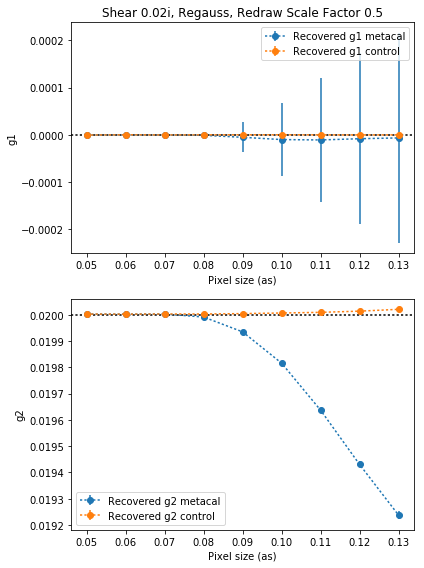

In [34]:
from matplotlib import pyplot as plt
fig, ax = responsivity.plot(b, procList, nameList, (0, 0.02))
ax[0].set_title("Shear 0.02i, Regauss, Redraw Scale Factor 0.5")
#plt.savefig("/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/recovered_g_vs_pixelsize_mcal-control_shear_0.02i_regauss_redraw0.5.png")

In [8]:
i=0
print a[i] == b[0][i]

[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [False False]
 [False False]
 [ True  True]]


In [17]:
print b[0][0]

[[ 2.00013273e-02 -2.87410650e-07]
 [ 2.00010935e-02  6.38262435e-07]
 [ 2.00017335e-02 -1.90219584e-07]
 [ 2.00018999e-02  1.41185299e-07]
 [ 2.00022819e-02 -1.12058218e-07]
 [ 2.00042740e-02 -2.36948115e-07]
 [ 2.00067277e-02  5.59404538e-08]
 [ 2.00110540e-02  1.22743729e-08]
 [ 2.00169401e-02 -1.90436484e-07]]


In [37]:
# recshape, shearList, hlr, sn, q, phiList, ident = responsivity.loadfiles(nameList[0], shape_method, killShearGT1)
# rc00 = recshape.copy()
# shearArr = np.array([[sh.g1, sh.g2] for sh in shearList])
# R = responsivity.calculateR(shearArr, rc00)
# R, recshape = responsivity.matchNans(R, rc00)
# R00 = R.copy()
# rc01 = recshape.copy()
rec_cosmoshear, rec_cosmoshear_std, true_mean_shape, tmsstd = responsivity.recover_cosmoshear(rc01, R00, nBootstrap, noBootstrap)
# return rec_cosmoshear, rec_cosmoshear_std, true_mean_shape, tmsstd


In [39]:
# resList = [responsivity.loadfiles(name, shape_method, killShearGT1) for name in nameList]
# res0 = resList[0]
# for res in resList:
#     for val1, val0 in zip(res[1:], res0[1:]):
#         assert np.all(val1 == val0)
# shearList = res0[1]
# shearArr = np.array([[sh.g1, sh.g2] for sh in shearList])
# recshapeList = [res[0] for res in resList]
# rcl00 = np.copy(recshapeList)
# RList = [responsivity.calculateR(shearArr, recshape) for recshape in recshapeList]
# Rrec = [responsivity.matchNans(R, recshape) for R, recshape in zip(RList, recshapeList)]
# RList, recshapeList = [x[0] for x in Rrec], [x[1] for x in Rrec]
# RList, recshapeList = matchNansBetween(RList, recshapeList)
res = [responsivity.recover_cosmoshear(recshape, R, nBootstrap, noBootstrap) for recshape, R in zip(recshapeList, RList)]

In [28]:
np.all((rc00 == rcl00[0]) | np.isnan(rc00))

True

In [51]:
print np.all((R00 == RList[0]) | np.isnan(R00))
print np.all((rc01 == recshapeList[0]) | np.isnan(rc01))

True
True


In [61]:
a = responsivity.recover_cosmoshear(rc01, R00, 10000,True)
b = responsivity.recover_cosmoshear(recshapeList[0], RList[0], 10,True)

In [106]:
rec_cosmoshear0, rec_cosmoshear_std0, tms0, tmsstd0 = b[0]
rec_cosmoshear, rec_cosmoshear_std, tms, tmsstd = b[1]
rec_cosmoshear, rec_cosmoshear_std, tms, tmsstd = a
proc = 'something'
proc0 = proc

In [115]:
print name

/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/redrawScaleFactor0.5/control/*0.02-0.0*.pkl


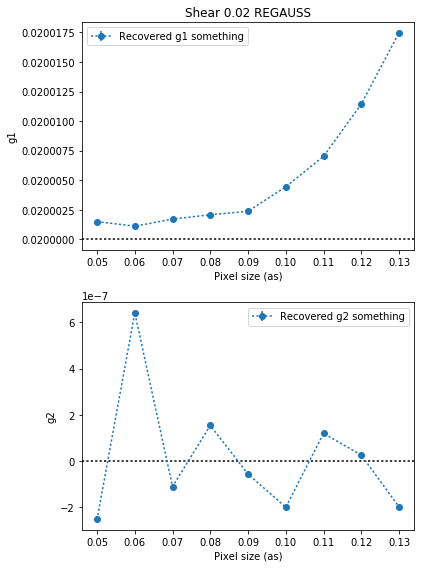

In [114]:
fn = sorted(glob.glob(name))
pixelscale = [float(re.findall("pixelscale0.\d\d?", x)[0][10:]) for x in fn]
xx = pixelscale
cshear = (0.02, 0)
xx0=xx
fig,ax = plt.subplots(2,1,figsize=(6,8))
for gindex in range(2):
    gis = str(gindex+1)
    subax=ax[gindex]
    #subax.errorbar(xx0, rec_cosmoshear0[:,gindex], yerr=rec_cosmoshear_std0[:,gindex], label="Rec g%s %s" % (gis, proc0), fmt='o:')
    subax.errorbar(xx, rec_cosmoshear[:,gindex], yerr=rec_cosmoshear_std[:,gindex], label="Recovered g%s %s" % (gis, proc), fmt='o:')

    subax.axhline(cshear[gindex], c='k', linestyle=':')
    subax.legend()
    subax.set_xlabel("Pixel size (as)")
    subax.set_ylabel("g"+gis)
ax[0].set_title("Shear %s %s" % (sl2[shear], shape_method))
plt.tight_layout()


In [108]:
print a[0]

[[ 2.00014996e-02 -2.51739488e-07]
 [ 2.00011170e-02  6.40400683e-07]
 [ 2.00017158e-02 -1.09478091e-07]
 [ 2.00020810e-02  1.54025274e-07]
 [ 2.00023770e-02 -5.57210591e-08]
 [ 2.00044442e-02 -1.98945781e-07]
 [ 2.00070193e-02  1.19746171e-07]
 [ 2.00114417e-02  2.65726212e-08]
 [ 2.00174759e-02 -1.97519671e-07]]


In [98]:
import glob
import re
from matplotlib import pyplot as plt

In [111]:
print xx

[0.08, 0.12, 0.07, 0.09, 0.06, 0.05, 0.13, 0.11, 0.1]
